In [8]:
#import libraries
import pandas as pd
import jax
import jax.numpy as jnp
from jax.tree_util import tree_map
from tensorflow.keras.datasets import mnist



In [26]:
#LOAD DATA

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

#Normalization
X_train = X_train/255.0
X_test = X_test/255.0


# Number of training example = 60000, dimension (24x28)

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [27]:
# Reshape the data to have 2D model

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print('Reshaped Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('X_test: ' + str(X_test.shape))

#Convert to jax array
X_train_jax = jnp.array(X_train)
Y_train_jax = jnp.array(Y_train)

X_test_jax = jnp.array(X_test)
Y_test_jax = jnp.array(Y_test)

Reshaped Dataset Shape:
X_train: (60000, 784)
X_test: (10000, 784)


In [18]:
#IMPORT LIBRARIES FOR LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
#LOGISTIC REGRESSION

logreg = LogisticRegression(max_iter= 10000,random_state=16)

#b) fit model with data
logreg.fit(X_train_jax, Y_train_jax)
y_pred = logreg.predict(X_test_jax)

In [28]:
#Model evaluation and confusion matrix

'''
A confusion matrix is a table that is used to evaluate the performance of a classification model. 
You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is 
the number of correct and incorrect predictions summed up class-wise.
'''

#import metrics class
from sklearn import metrics

In [29]:
#Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
conf_matrix = metrics.confusion_matrix(Y_test_jax, y_pred)
print(conf_matrix)

[[ 958    0    1    3    1    9    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   16   10    3   12    9   33    4]
 [   4    1   17  921    1   25    2   10   21    8]
 [   1    3    8    3  920    0    6    4    6   31]
 [   9    2    3   34    8  780   15    6   31    4]
 [   8    3    8    2    7   17  910    2    1    0]
 [   1    7   24    6    6    1    0  948    3   32]
 [  10   11    6   21    8   27   14   10  855   12]
 [   9    7    1    9   21    7    0   20    8  927]]


Text(0.5, 58.7222222222222, 'Predicted label')

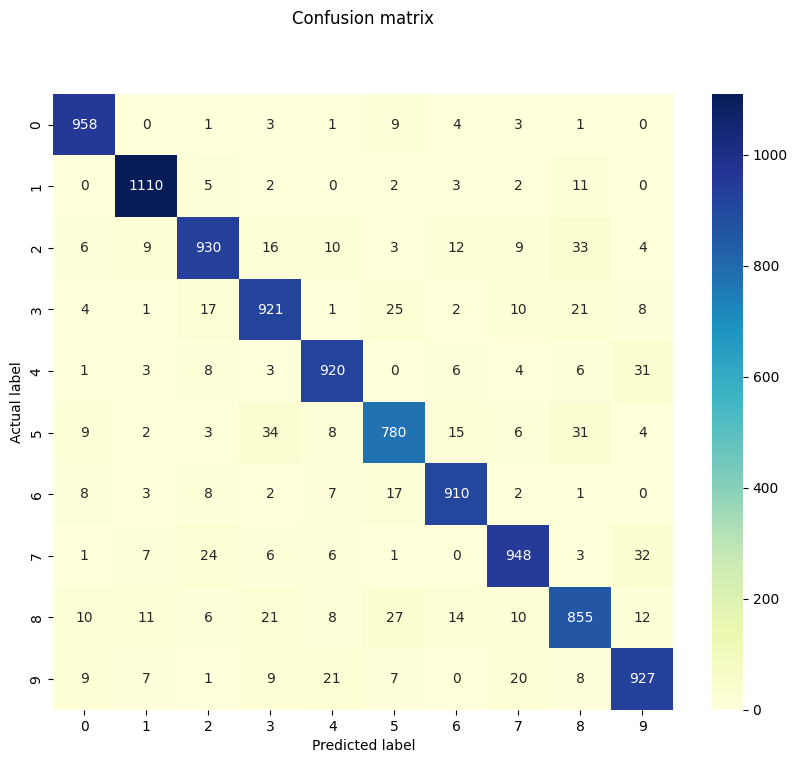

In [32]:
#create heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

'''
The diagonal elements (C(i,i)) represent 
the number of correctly predicted instances for each class i.
'''

In [33]:
#evaluate accuracy of model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test_jax, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


In [ ]:
#CHECK the ROC CURVE
'''
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against 
the false positive rate. It shows the tradeoff between sensitivity and specificity.

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, 
and 0.5 represents a worthless classifier.

'''

In [36]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [37]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_jax, Y_train_jax)

#Predict the response for test dataset
y_pred = clf.predict(X_test_jax)

In [38]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test_jax, y_pred))

Accuracy: 0.8733
